# `This github can be useful sometimes`

In [2]:
!git clone https://github.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example.git

Cloning into 'FreeCodeCamp-Pandas-Real-Life-Example'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (12/12), done.


**Import Modules for Data analysis**

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests


<h2><font color="orange">Let's read our data</font></h2>

In [4]:
data = pd.read_csv('/content/FreeCodeCamp-Pandas-Real-Life-Example/data/sales_data.csv', parse_dates=["Date"])

In [5]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


<h3><font color="#1069E2">What is the size of our Data</font></h3>

In [6]:
data.shape

(113036, 18)

<h3><font color="#1069E2">Information about or data[Types of Data]</font></h3>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [8]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
data["Order_Quantity"].describe()

count    113036.000000
mean         11.901660
std           9.561857
min           1.000000
25%           2.000000
50%          10.000000
75%          20.000000
max          32.000000
Name: Order_Quantity, dtype: float64

In [10]:
data["Order_Quantity"].median()

10.0

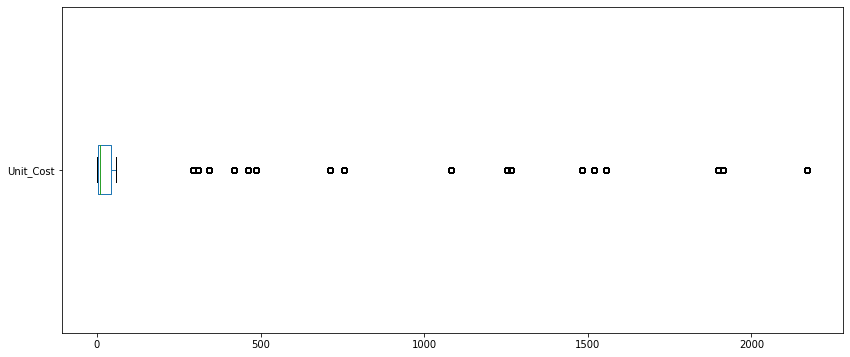

In [11]:
data["Unit_Cost"].plot(kind="box", vert=False, figsize=(14,6))

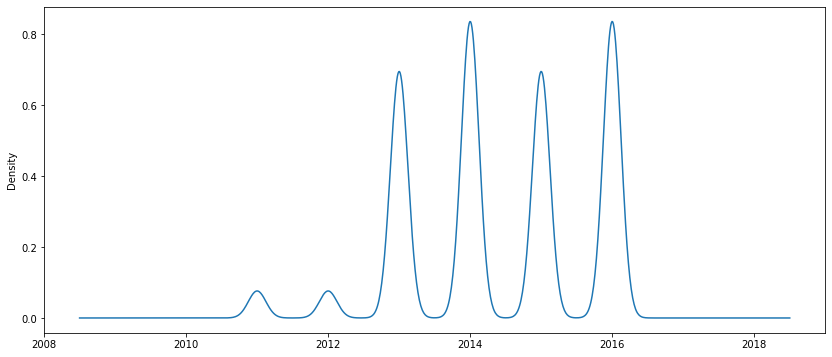

In [12]:
data["Year"].plot(kind="density", figsize=(14,6))

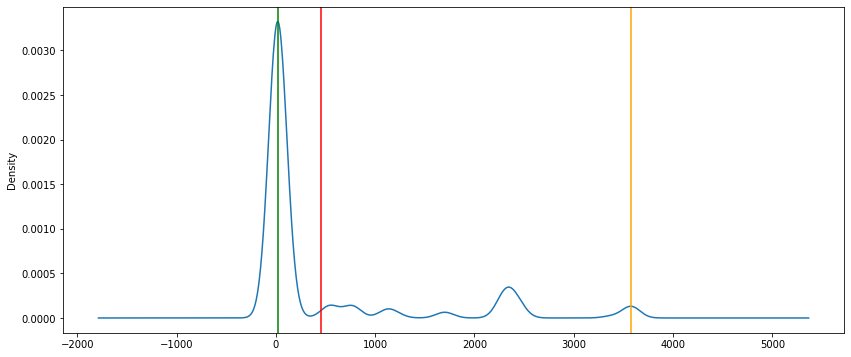

In [13]:
a = data["Unit_Price"].plot(kind="density",figsize=(14,6))
a.axvline(data["Unit_Price"].mean(), color="red")
a.axvline(data["Unit_Price"].median(), color="green")
a.axvline(data["Unit_Price"].max(), color="orange")

Text(0.5, 0, 'Dollars')

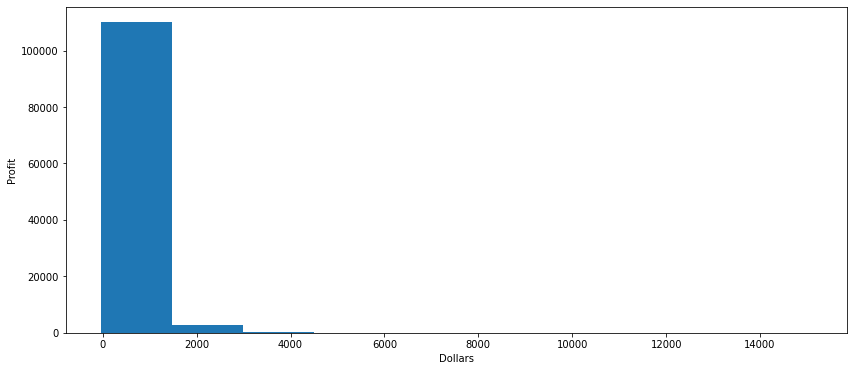

In [14]:
b = data["Profit"].plot(kind="hist", figsize=(14, 6))
b.set_ylabel("Profit")
b.set_xlabel("Dollars")

In [15]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [16]:
data["Age_Group"].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

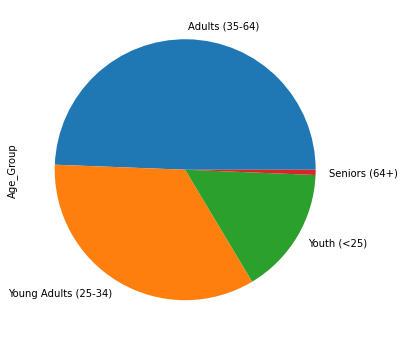

In [17]:
data["Age_Group"].value_counts().plot(kind="pie", figsize=(14,6))

Text(0, 0.5, 'Number of Sales')

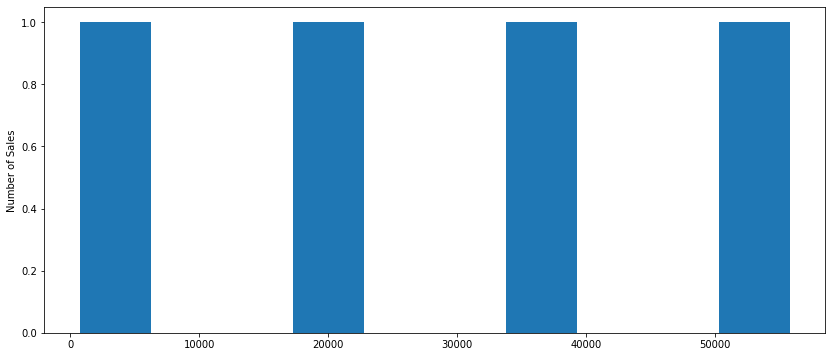

In [18]:
a=data["Age_Group"].value_counts().plot(kind="hist", figsize=(14,6))
a.set_ylabel("Number of Sales")

In [19]:
correlation = data.corr()
correlation

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x7fa2d85e02d0>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Cost'),
  Text(0, 0, 'Revenue')])

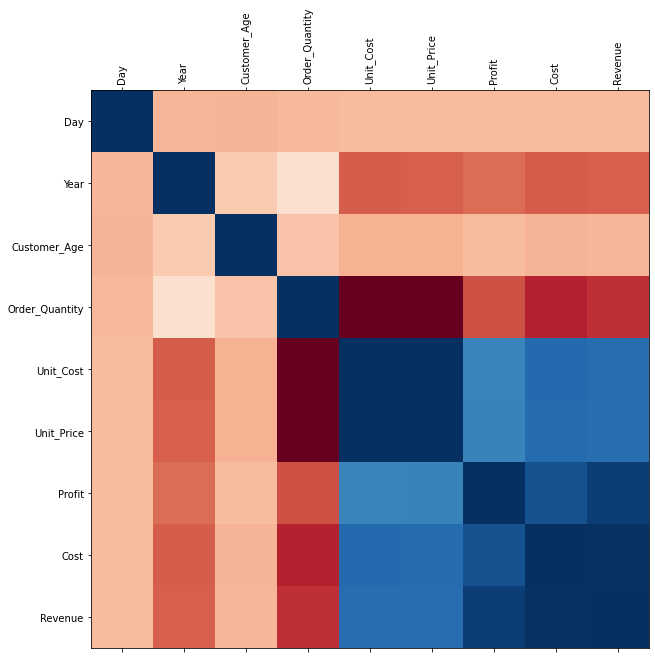

In [20]:
figure = plt.figure(figsize=(10,10))

plt.matshow(correlation, cmap="RdBu", fignum=figure.number)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation="vertical")
plt.yticks(range(len(correlation.columns)), correlation.columns)

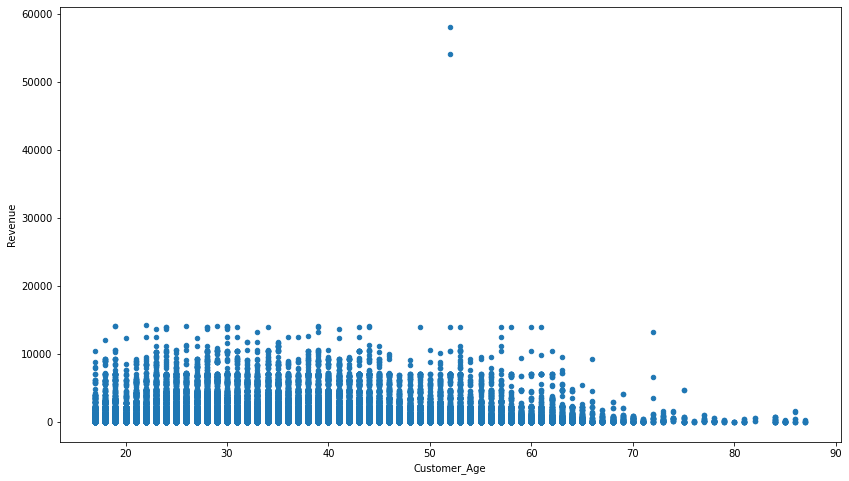

In [21]:
data.plot(kind="scatter", x="Customer_Age", y="Revenue", figsize=(14,8))

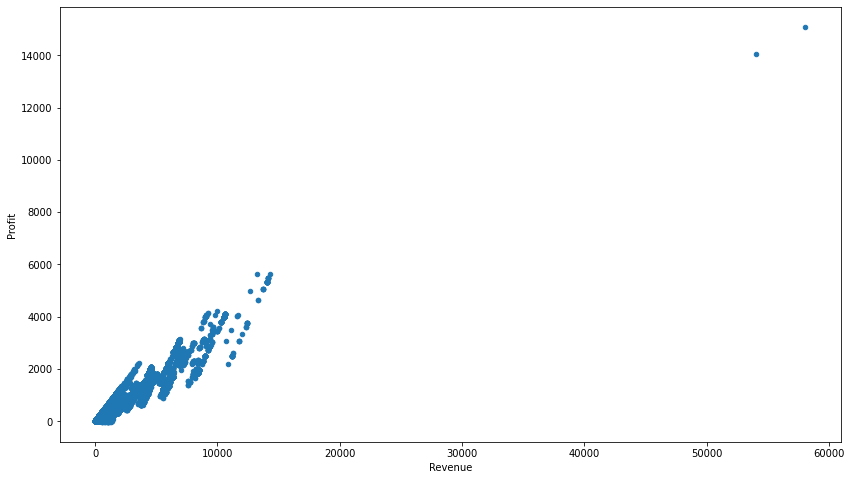

In [22]:
data.plot(kind="scatter", x="Revenue", y="Profit", figsize=(14,8))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Profit')

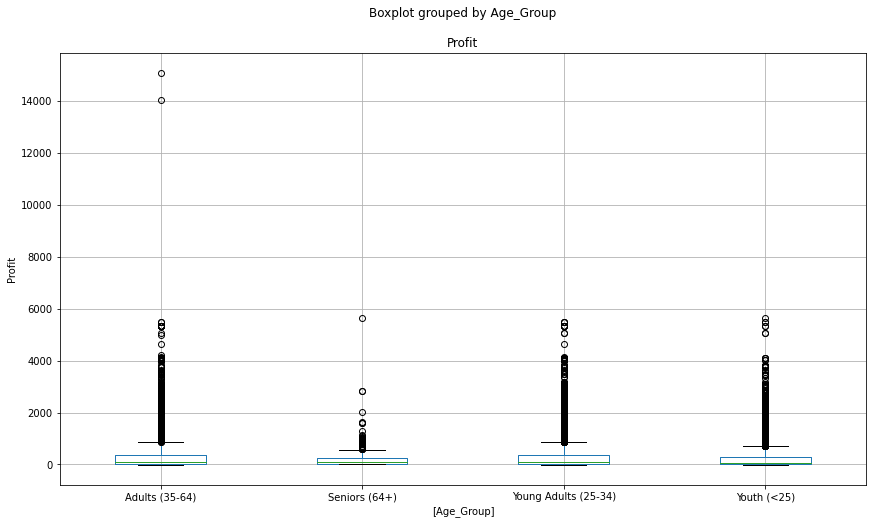

In [23]:
ax = data[["Profit", "Age_Group"]].boxplot(by="Age_Group", figsize=(14,8))
ax.set_ylabel("Profit")

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

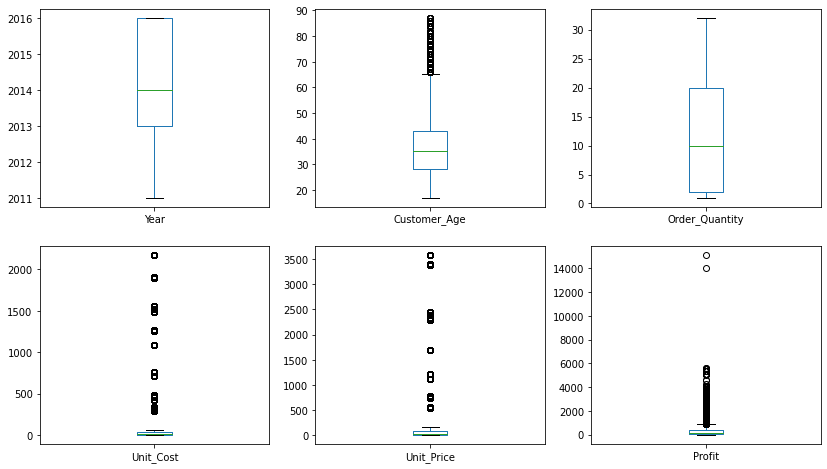

In [24]:
columns = ["Year", "Customer_Age", "Order_Quantity", "Unit_Cost", "Unit_Price", "Profit"]
data[columns].plot(kind="box", subplots=True, layout=(2,3), figsize=(14,8))

<h1><b>Columns Wrangling</b></h1>

In [25]:
#add and calculate a new revenue
data["Revenue per age"] = data["Revenue"]/data["Customer_Age"]
data["Revenue per age"].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue per age, dtype: float64

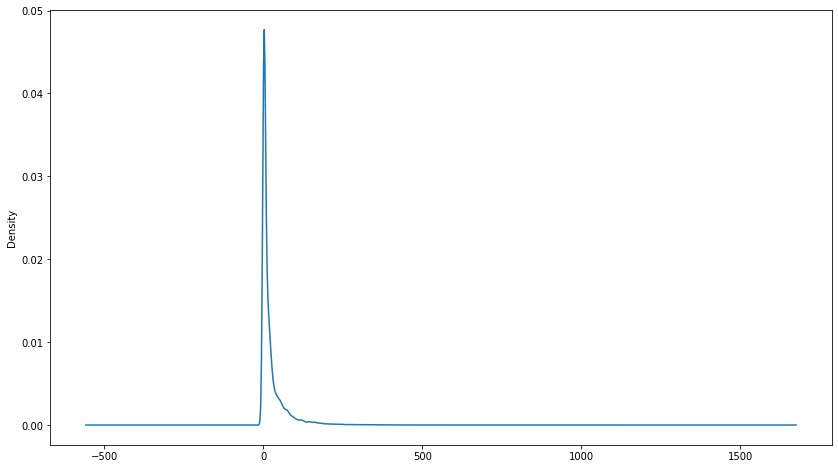

In [26]:
data["Revenue per age"].plot(kind="density", figsize=(14,8))

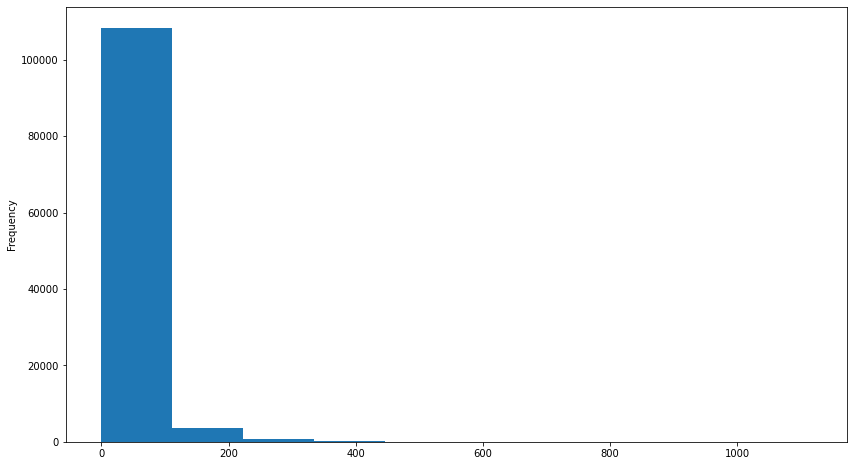

In [27]:
data["Revenue per age"].plot(kind="hist", figsize=(14,8))

In [28]:
#add and calculate a new calculated cost
data["Calculated Cost"] = data["Order_Quantity"] * data["Unit_Cost"]
data["Calculated Cost"].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated Cost, dtype: int64

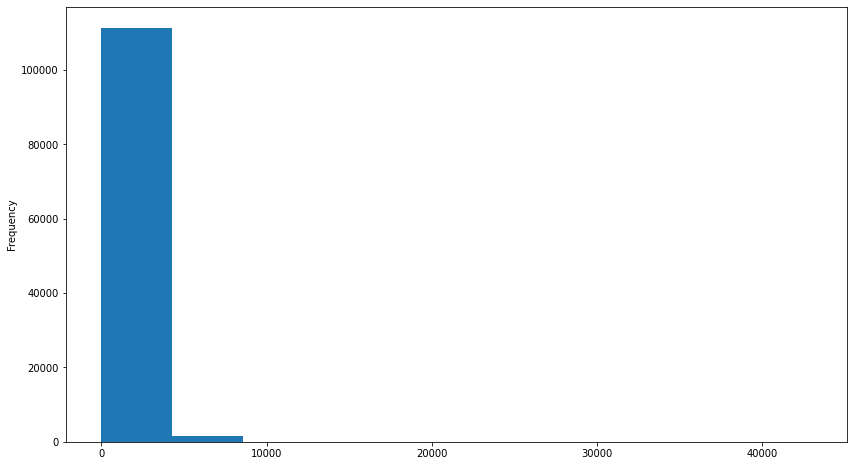

In [29]:
data["Calculated Cost"].plot(kind="hist", figsize=(14,8))

In [30]:
(data["Calculated Cost"] != data["Cost"]).sum()

0

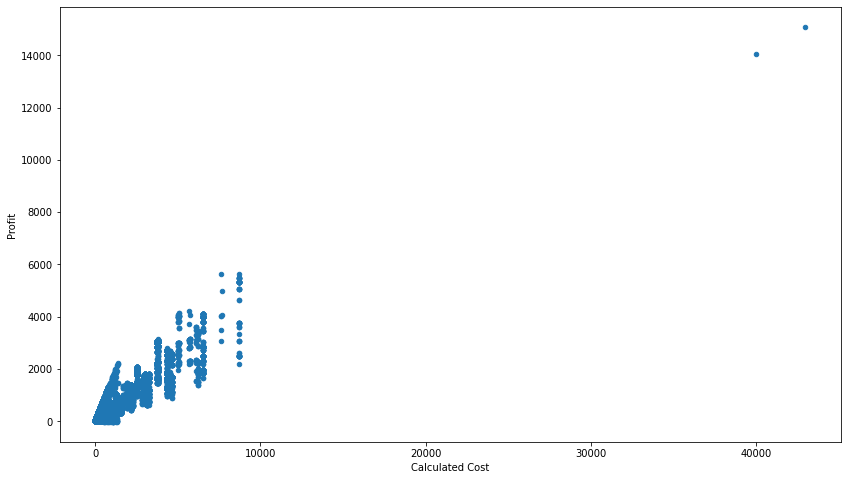

In [31]:
data.plot(kind="scatter", x="Calculated Cost", y="Profit", figsize=(14,8))

In [32]:
data["Calculated Revenue"] = data["Cost"] + data["Profit"]
data["Calculated Revenue"].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated Revenue, dtype: int64

In [33]:
(data["Calculated Revenue"] != data["Revenue"]).sum()

0

In [34]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue per age,Calculated Cost,Calculated Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


In [35]:
#adding 3% tax
data['Unit_Price'] *= 1.03
data["Unit_Price"].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [38]:
#locate all the data from New South Wales	 
data.loc[data["State"] == "New South Wales"]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue per age,Calculated Cost,Calculated Revenue
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,123.60,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,123.60,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,123.60,238,180,418,8.893617,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,123.60,297,225,522,11.106383,225,522
120,2014-01-02,2,January,2014,34,Young Adults (25-34),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,123.60,297,225,522,15.352941,225,522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112985,2016-05-05,5,May,2016,25,Young Adults (25-34),M,Australia,New South Wales,Clothing,Vests,"Classic Vest, L",14,24,65.92,444,336,780,31.200000,336,780
112996,2014-03-25,25,March,2014,58,Adults (35-64),F,Australia,New South Wales,Clothing,Vests,"Classic Vest, L",9,24,65.92,285,216,501,8.637931,216,501
112997,2016-03-25,25,March,2016,58,Adults (35-64),F,Australia,New South Wales,Clothing,Vests,"Classic Vest, L",10,24,65.92,317,240,557,9.603448,240,557
112998,2014-04-06,6,April,2014,58,Adults (35-64),F,Australia,New South Wales,Clothing,Vests,"Classic Vest, L",25,24,65.92,792,600,1392,24.000000,600,1392


In [39]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue per age,Calculated Cost,Calculated Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,123.6,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,123.6,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,123.6,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,123.6,238,180,418,8.893617,180,418


In [43]:
data.loc[(data["Age_Group"] == "Youth (<25)") | (data["Age_Group"] == "Adults (35-64)")].shape[0]

73652

In [47]:
data.loc[data["Age_Group"] == "Youth (<25)", "Revenue"].mean()

657.5723019968589

In [48]:
data.loc[(data["Age_Group"] == "Youth (<25)") & (data["Country"] == "Australia"), "Revenue"].mean()

918.9495664080329

In [50]:
#Increase the revenue by 10% every sale made in United States
data.loc[data["Country"]=="United States", "Revenue"].head()

22     929
23     722
34     929
35     929
38    1176
Name: Revenue, dtype: int64

In [51]:
data.loc[data["Country"]=="United States", "Revenue"] *= 1.01

In [52]:
data.loc[data["Country"]=="United States", "Revenue"].head()

22     938.29
23     729.22
34     938.29
35     938.29
38    1187.76
Name: Revenue, dtype: float64

<h1><b><i><font color="sky-blue">Interacting with Data</font></i></b></h1>